<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
===================================================
Team: Quant Collective
Authors: Sheldon Kemper, Rita Bini, Kasia Kirby, Chiaki Tachikawa, Oscar Bowden, Arijit Mitra

LinkedIn Profiles:
    - Sheldon Kemper: https://www.linkedin.com/in/sheldon-kemper
    - Rita Bini: https://www.linkedin.com/in/rita-bini/
    - Kasia Kirby: https://www.linkedin.com/in/kasia-kirby/
    - Chiaki Tachikawa: https://www.linkedin.com/in/chiaki-tachikawa-56b07372/
    - Oscar Bowden: https://www.linkedin.com/in/oscar-bowden-4b14711b7/
    - Arijit Mitra: https://www.linkedin.com/in/arijit-mitra-09b40271/

Date: 2025-02-04       Version: 1.2

Description:
    This notebook functions as the central orchestrator for our comprehensive NLP pipeline, engineered to convert
    unstructured quarterly announcements and Q&A transcripts from Global Systemically Important Banks (G-SIBs)
    into actionable insights for the Bank of England. This robust pipeline encapsulates the following key processes:

    1. Data Collection & Preprocessing:
       - Systematic ingestion of raw data from diverse sources (e.g., PDFs, HTML, transcripts)
       - Rigorous data cleaning, noise reduction, and formatting standardization
       - Preliminary Exploratory Data Analysis (EDA) to identify and understand data characteristics

    2. Methodology & Modelling:
       - Deployment of BERTopic for advanced topic modelling and latent theme extraction
       - Utilization of FinBERT to gauge market sentiment within transcript segments
       - Implementation of a summarisation pipeline to generate concise summaries from extensive texts

    3. Agentic RAG Modelling Process:
       - Integration of an agentic Retrieval-Augmented Generation (RAG) chatbot
       - Leverages context from vector stores and domain-specific data for enhanced retrieval
       - Provides interactive, context-aware responses to support dynamic Q&A scenarios

This document epitomises the combined expertise of Quant Collective in developing robust, scalable data engineering solutions
tailored for complex financial datasets.
===================================================
"""


'\n===================================================\nTeam: Quant Collective\nAuthors: Sheldon Kemper, Rita Bini, Kasia Kirby, Chiaki Tachikawa, Oscar Bowden, Arijit Mitra\n\nLinkedIn Profiles:\n    - Sheldon Kemper: https://www.linkedin.com/in/sheldon-kemper\n    - Rita Bini: https://www.linkedin.com/in/rita-bini/\n    - Kasia Kirby: https://www.linkedin.com/in/kasia-kirby/\n    - Chiaki Tachikawa: https://www.linkedin.com/in/chiaki-tachikawa-56b07372/\n    - Oscar Bowden: https://www.linkedin.com/in/oscar-bowden-4b14711b7/\n    - Arijit Mitra: https://www.linkedin.com/in/arijit-mitra-09b40271/\n\nDate: 2025-02-04       Version: 1.2\n\nDescription:\n    This notebook functions as the central orchestrator for our comprehensive NLP pipeline, engineered to convert\n    unstructured quarterly announcements and Q&A transcripts from Global Systemically Important Banks (G-SIBs)\n    into actionable insights for the Bank of England. This robust pipeline encapsulates the following key proces

# Download Notebooks

In [2]:
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/import/sk_import_PDF.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/cleansed/sk_processed_ubs.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/cleansed/sk_processed_jpmorgan.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/cleansed/kk_eda_V2.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/modelling/kk_mvp_modelling_V2.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/modelling/ob_flan_t5_sentiment_jpm.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/modelling/rb_flan_t5_summarisation.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/modelling/ob_flan_t5_sentiment_jpm.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/processed/ct_preprocessing_ubs.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/processed/ct_preprocessing_jpmorgan.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/modelling/am_topic_modelling_analysis_v1_0.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/modelling/am_boe_topic_modelling_v2.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/modelling/am_hierarchial_topic_clustering.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/modelling/am_data_processing_risk_high_topics_v2.0
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/modelling/am_topic_clustering_visualization.ipynb
!wget -q https://raw.githubusercontent.com/sheldonkemper/bank_of_england/refs/heads/main/notebooks/modelling/sk_gen_ai_rag.ipynb


## Mount Shared Drive

In [3]:
import os
from google.colab import drive
# Mount Google Drive to the root location with force_remount
drive.mount('/content/drive', force_remount=True)

# Assuming 'BOE' folder is in 'MyDrive' and already shared
BOE_path = '/content/drive/MyDrive/BOE/bank_of_england/data'

# Now you (and others with access) can work with files in this directory
# For example, you can list the contents:
print(os.listdir(BOE_path))

Mounted at /content/drive
['cleansed', 'raw', 'model_outputs', 'preprocessed_data']


# 1. Data Collection & Preprocessing

## 1.1 Ingestion of raw data from multiple sources

In [4]:
sk_bank_17 = "ubs"
%run sk_import_PDF.ipynb

Mounted at /content/drive
The value of my_variable is: ubs

Summary of Downloads:
('https://www.ubs.com/global/en/investor-relations/financial-information/quarterly-reporting/qr-shared/2023/1q23/_jcr_content/mainpar/toplevelgrid_copy_co/col1/linklistreimagined_c/link_2038370922.1996821412.file/PS9jb250ZW50L2RhbS9hc3NldHMvY2MvaW52ZXN0b3ItcmVsYXRpb25zL3F1YXJ0ZXJsaWVzLzIwMjMvMXEyMy8xcTIzLWVhcm5pbmdzLWNhbGwtcmVtYXJrcy5wZGY=/1q23-earnings-call-remarks.pdf', 'exists', '/content/drive/MyDrive/BOE/bank_of_england/data/raw/ubs/1q23-earnings-call-remarks.pdf')
('https://www.ubs.com/global/en/investor-relations/financial-information/quarterly-reporting/qr-shared/2023/2q23/_jcr_content/mainpar/toplevelgrid_copy_co/col1/linklistreimagined_c/link_2038370922_copy.1634234040.file/PS9jb250ZW50L2RhbS9hc3NldHMvY2MvaW52ZXN0b3ItcmVsYXRpb25zL3F1YXJ0ZXJsaWVzLzIwMjMvMnEyMy8ycTIzLWVhcm5pbmdzLWNhbGwtcmVtYXJrcy5wZGY=/2q23-earnings-call-remarks.pdf', 'exists', '/content/drive/MyDrive/BOE/bank_of_england/data/raw/

In [5]:
sk_bank_17 = "jpmorgan"
%run sk_import_PDF.ipynb

Mounted at /content/drive
The value of my_variable is: jpmorgan

Summary of Downloads:
('https://www.jpmorganchase.com/content/dam/jpmc/jpmorgan-chase-and-co/investor-relations/documents/quarterly-earnings/2023/4th-quarter/jpm-4q23-earnings-call-transcript.pdf', 'exists', '/content/drive/MyDrive/BOE/bank_of_england/data/raw/jpmorgan/jpm-4q23-earnings-call-transcript.pdf')
('https://www.jpmorganchase.com/content/dam/jpmc/jpmorgan-chase-and-co/investor-relations/documents/quarterly-earnings/2023/1st-quarter/1q23-earnings-transcript.pdf', 'exists', '/content/drive/MyDrive/BOE/bank_of_england/data/raw/jpmorgan/1q23-earnings-transcript.pdf')
('https://www.jpmorganchase.com/content/dam/jpmc/jpmorgan-chase-and-co/investor-relations/documents/quarterly-earnings/2023/2nd-quarter/2q23-earnings-transcript.pdf', 'exists', '/content/drive/MyDrive/BOE/bank_of_england/data/raw/jpmorgan/2q23-earnings-transcript.pdf')
('https://www.jpmorganchase.com/content/dam/jpmc/jpmorgan-chase-and-co/investor-relat

## 1.2 Data cleaning

### Initial Data cleaning

In [6]:
# JP MOrgan to be provided by Arijit
# %run

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/cleansed/sk_processed_ubs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# UBS
%run sk_processed_ubs.ipynb

Mounted at /content/drive
Processing file: 1q23-earnings-call-remarks.pdf
Processing file: 1q24-earnings-call-remarks.pdf
Processing file: 2q23-earnings-call-remarks.pdf
Processing file: 2q24-earnings-call-remarks.pdf
Processing file: 3q23-earnings-call-remarks.pdf
Processing file: 3q24-earnings-call-remarks.pdf
Processing file: 4q23-earnings-call-remarks.pdf
Processing file: 4q24-earnings-call-remarks.pdf
Management announcements saved to: /content/drive/MyDrive/BOE/bank_of_england/data/cleansed/ubs_management_discussion.csv
Q&A section saved to: /content/drive/MyDrive/BOE/bank_of_england/data/cleansed/ubs_qna_section.csv


## 1.3 Preprocessing

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/processed/ct_preprocessing_jpmorgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# JPM
%run ct_preprocessing_jpmorgan.ipynb

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Check if there is nil values on DF: Quarter                 0
Question                0
Question_cleaned        0
Analyst                 0
Analyst Role            0
Response               13
Response_cleaned        0
Executive               3
Executive Role Type     3
dtype: int64
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/processed/ct_preprocessing_ubs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# UBS
%run ct_preprocessing_ubs.ipynb

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Here is the number of null value in the dataframe.: 
speaker                0
job_title              0
utterance              0
call_date              0
financial_quarter      0
source_file            0
dummy                309
ex_dummy             364
category               0
dtype: int64


<ipython-input-9-cd3cee0e7408>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col1]=data[col]
<ipython-input-9-cd3cee0e7408>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col2]=data[col]
<ipython-input-9-cd3cee0e7408>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

# 2.Exploratory Data Analysis (EDA)

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/cleansed/kk_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


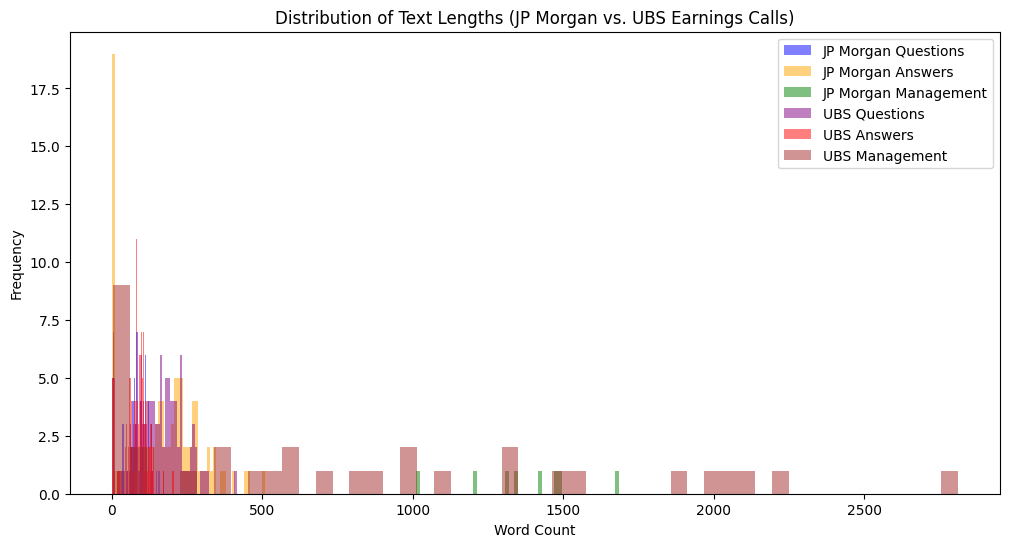

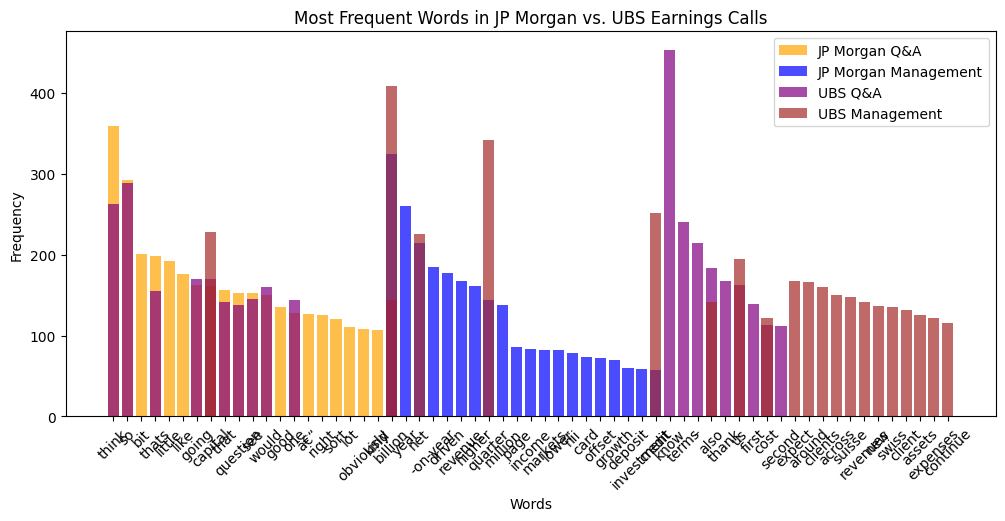

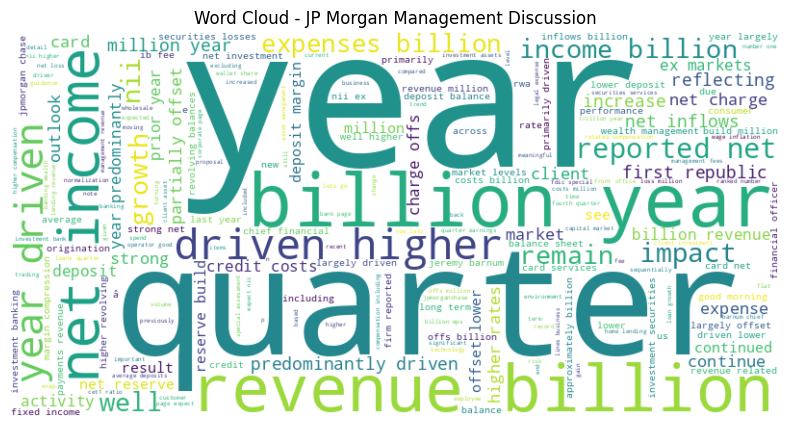

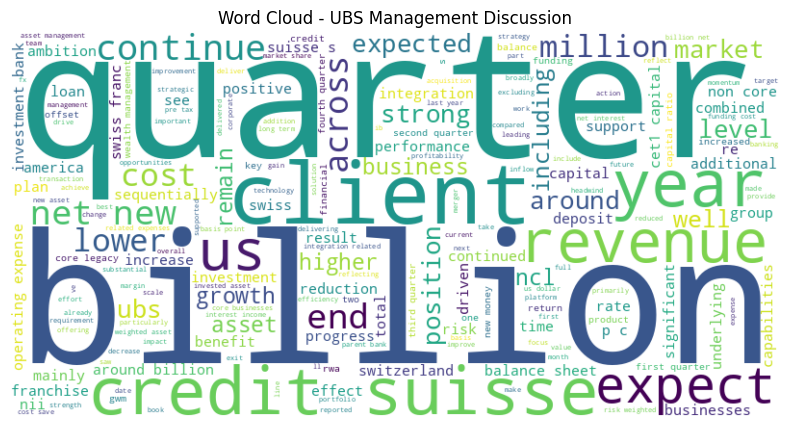

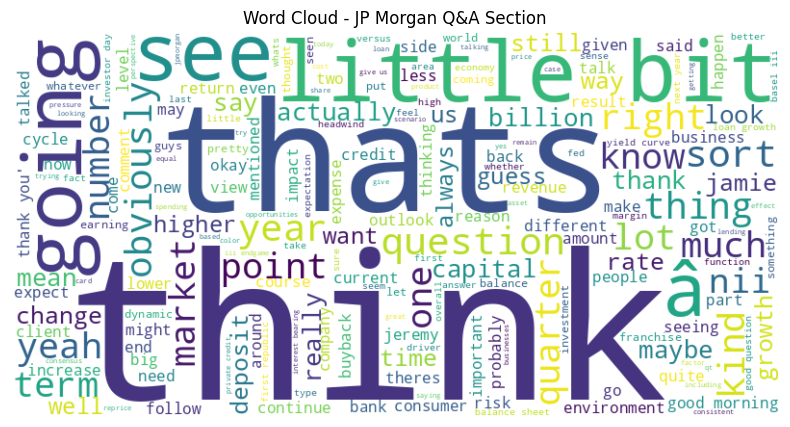

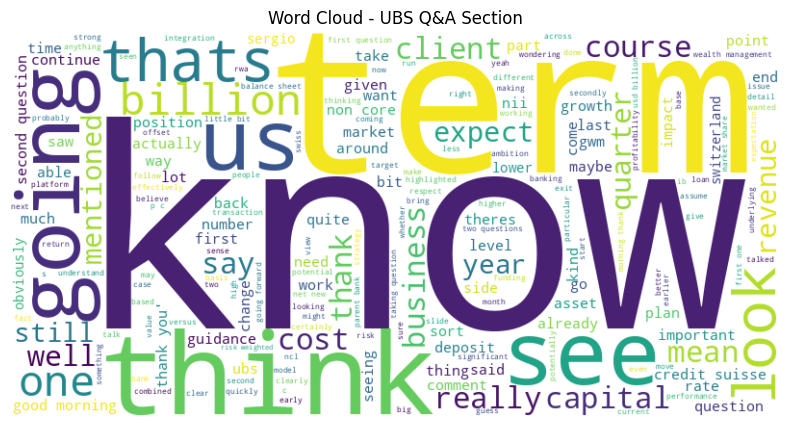


Top Bigrams in JP Morgan Q&A:
 [(('little', 'bit'), 166), (('good', 'morning'), 43), (('thank', "you']"), 42), (('so', 'think'), 31), (('loan', 'growth'), 29), (('first', 'republic'), 27), (('basel', 'iii'), 26), (('investor', 'day'), 25), (('yield', 'curve'), 25), (('good', 'question'), 24), (('balance', 'sheet'), 23), (('got', 'it'), 23), (('private', 'credit'), 22), (('give', 'us'), 22), (('else', 'equal'), 22)]

Top Bigrams in JP Morgan Management Discussion:
 [(('year', '-on-year'), 185), (('net', 'income'), 61), (('driven', 'higher'), 60), (('reported', 'net'), 46), (('-on-year', 'driven'), 42), (('predominantly', 'driven'), 37), (('net', 'inflows'), 37), (('first', 'republic'), 37), (('partially', 'offset'), 32), (('higher', 'rates'), 31), (('net', 'charge'), 30), (('billion', 'revenue'), 28), (('credit', 'costs'), 27), (('ex', 'markets'), 26), (('quarter', '-on-quarter'), 25)]

Top Trigrams in JP Morgan Q&A:
 [(('basel', 'iii', 'endgame'), 21), (("['hi", 'good', 'morning'), 18

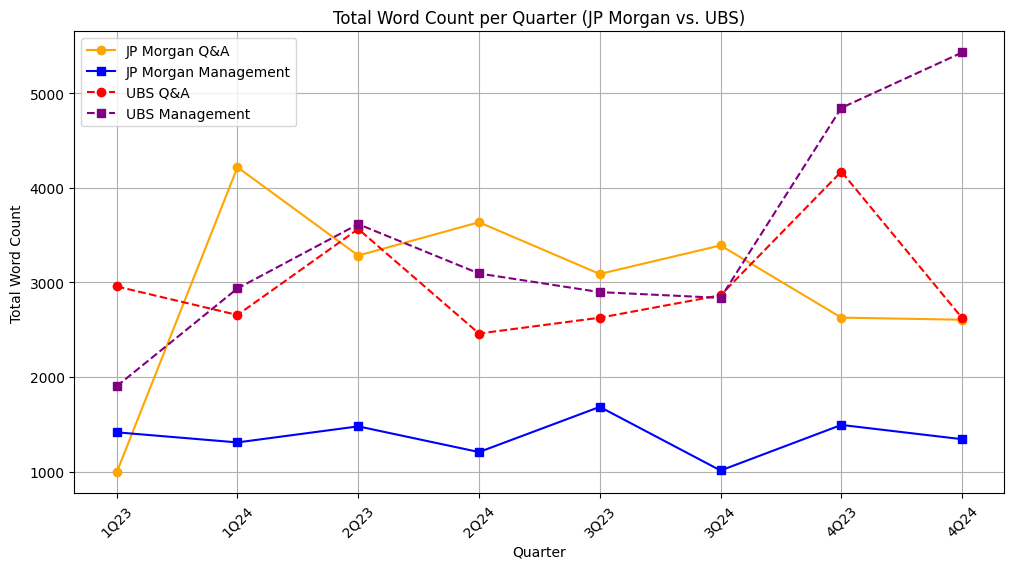

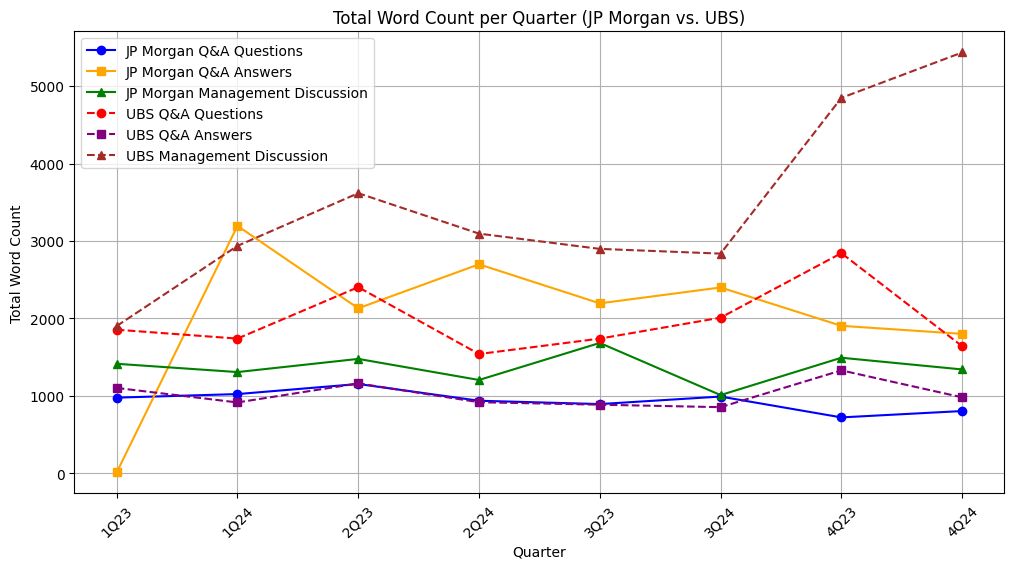

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


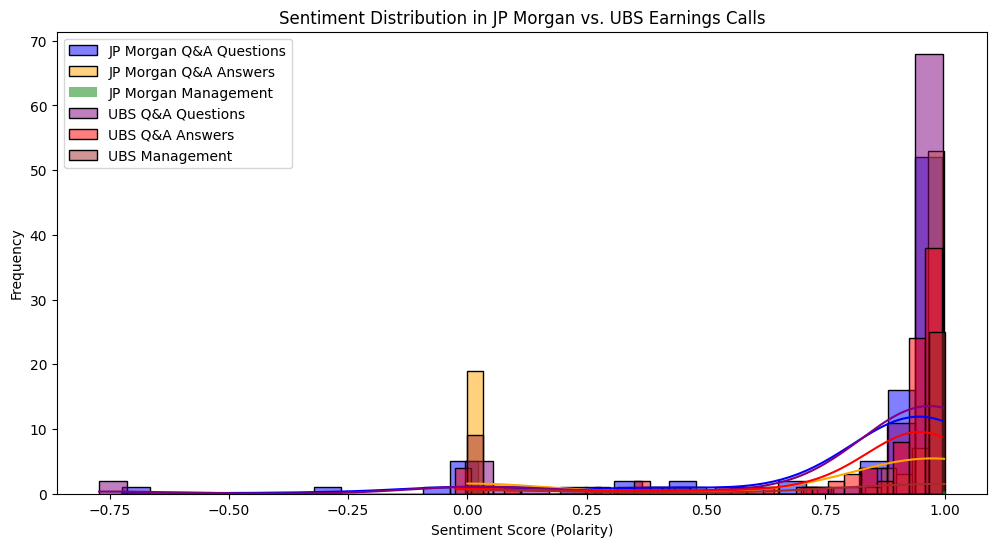

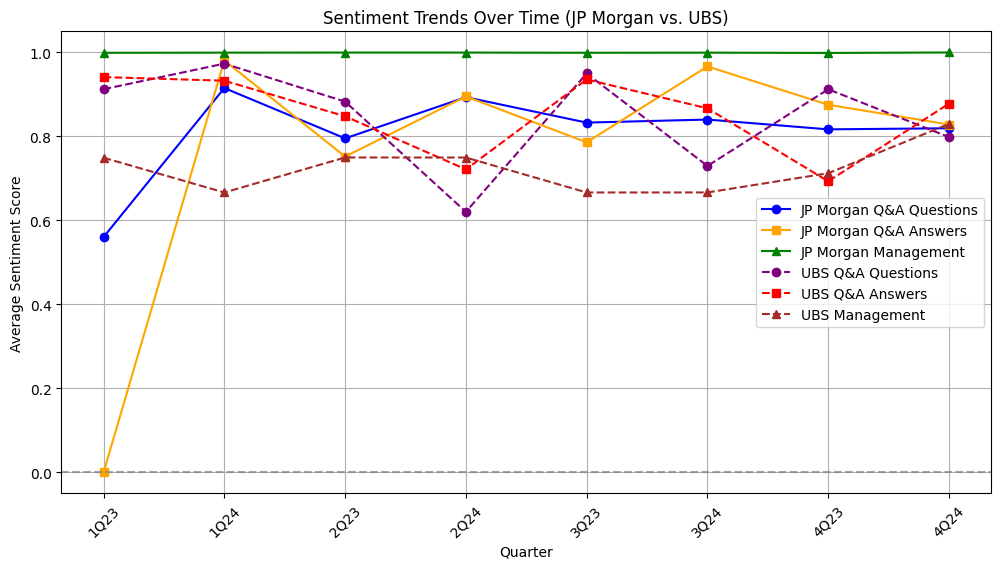


Sentiment Summary Statistics (JP Morgan):
Q&A Questions: count    91.000000
mean      0.805635
std       0.339251
min      -0.723400
25%       0.883250
50%       0.950000
75%       0.973800
max       0.995300
Name: question_sentiment, dtype: float64
Q&A Answers: count    91.000000
mean      0.748988
std       0.401932
min       0.000000
25%       0.794600
50%       0.976400
75%       0.992250
max       0.998900
Name: answer_sentiment, dtype: float64
Management Discussion: count    8.000000
mean     0.999125
std      0.000365
min      0.998500
25%      0.998875
50%      0.999200
75%      0.999400
max      0.999600
Name: text_sentiment, dtype: float64

Sentiment Summary Statistics (UBS):
Q&A Questions: count    96.000000
mean      0.844891
std       0.348417
min      -0.771700
25%       0.926300
50%       0.977750
75%       0.990050
max       0.997100
Name: question_sentiment, dtype: float64
Q&A Answers: count    96.000000
mean      0.840080
std       0.260181
min      -0.025800
25%    

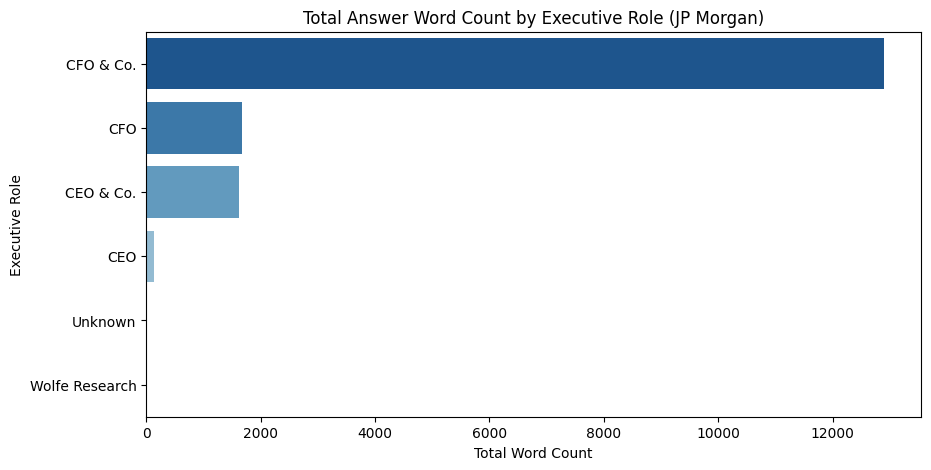

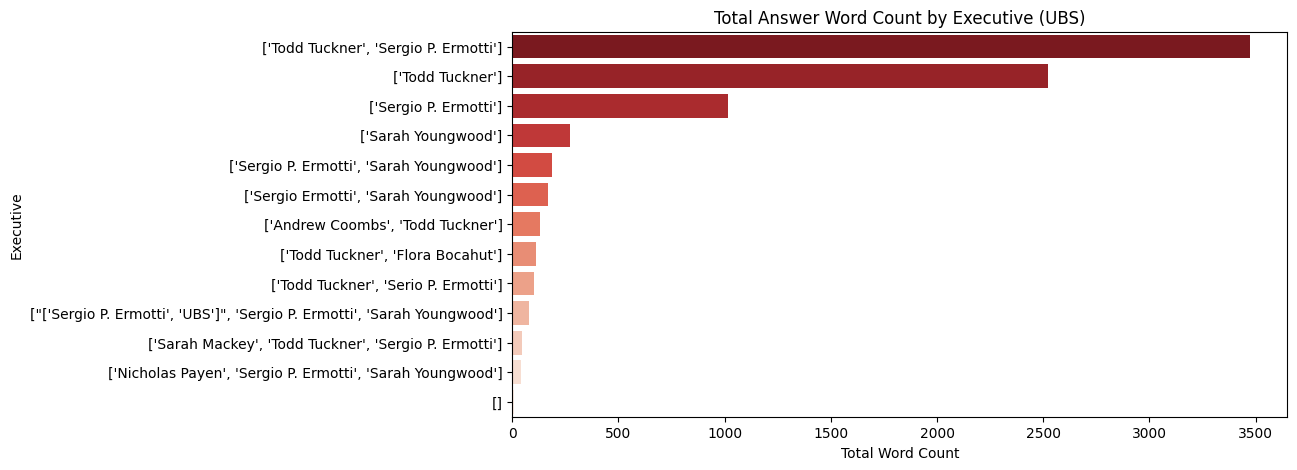

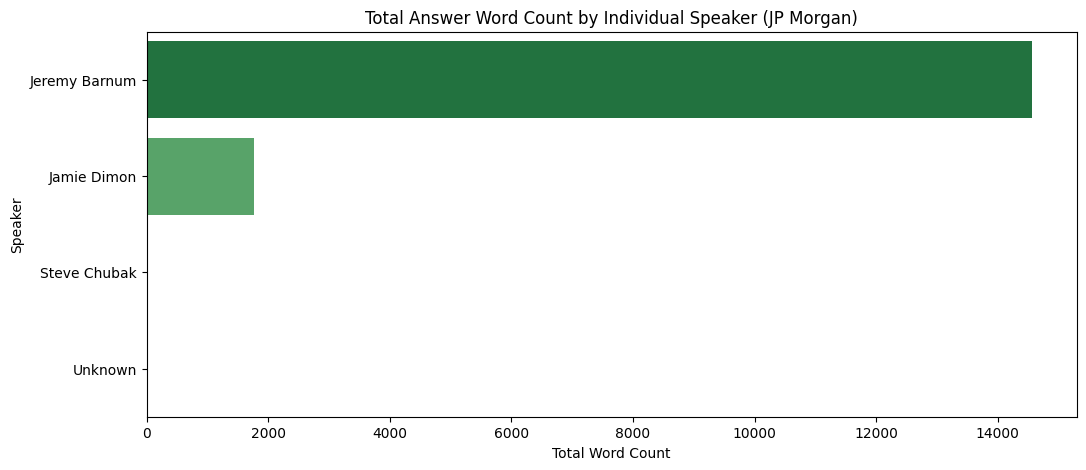

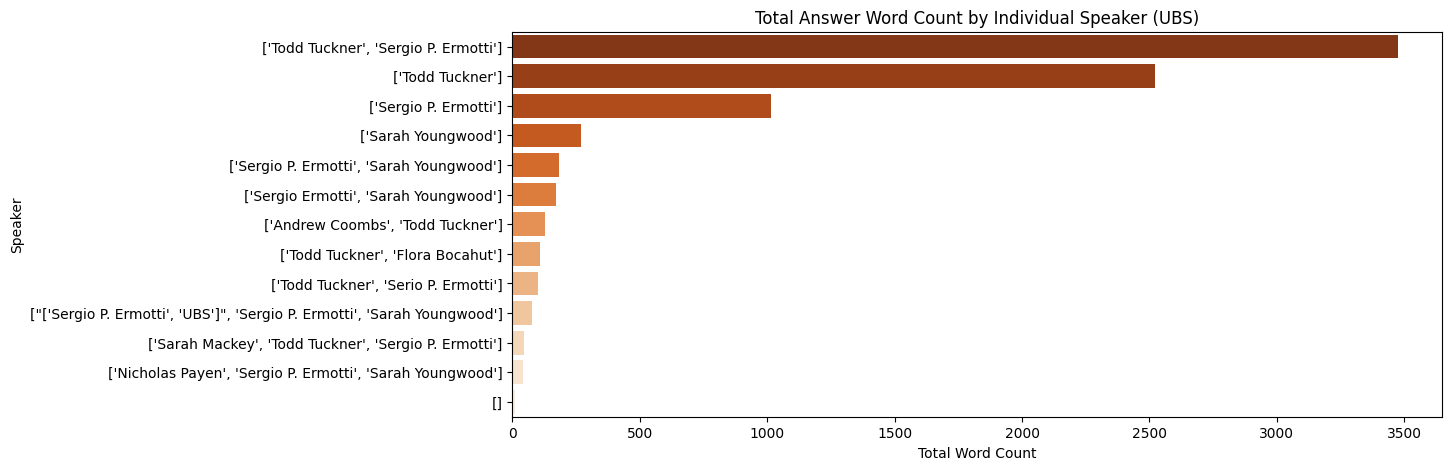

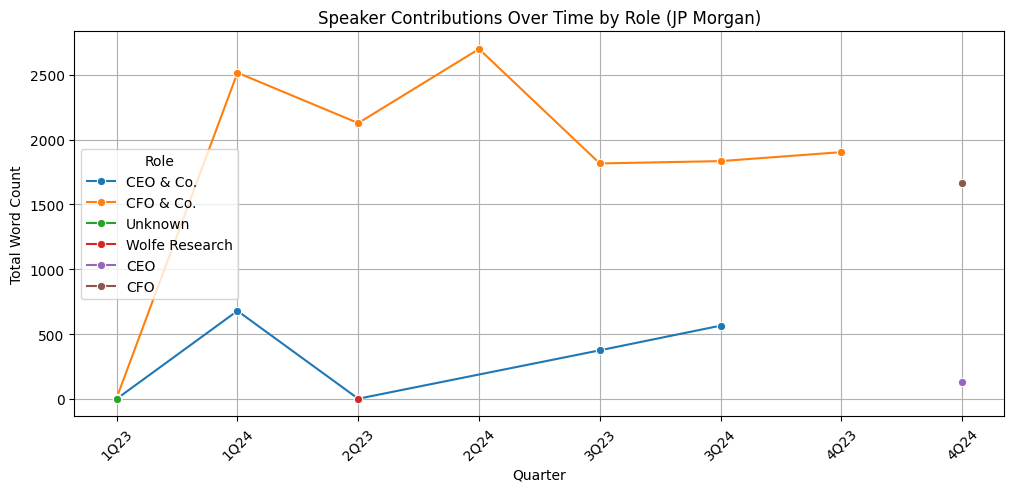

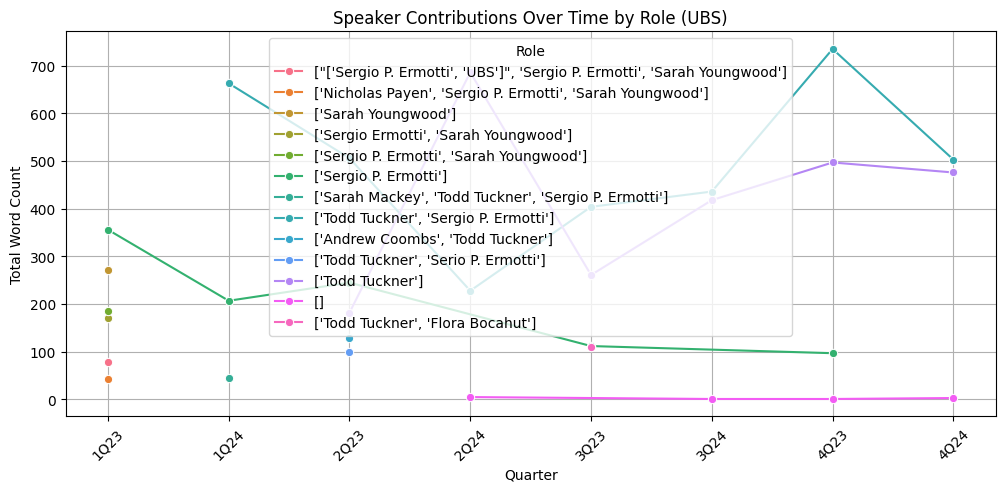

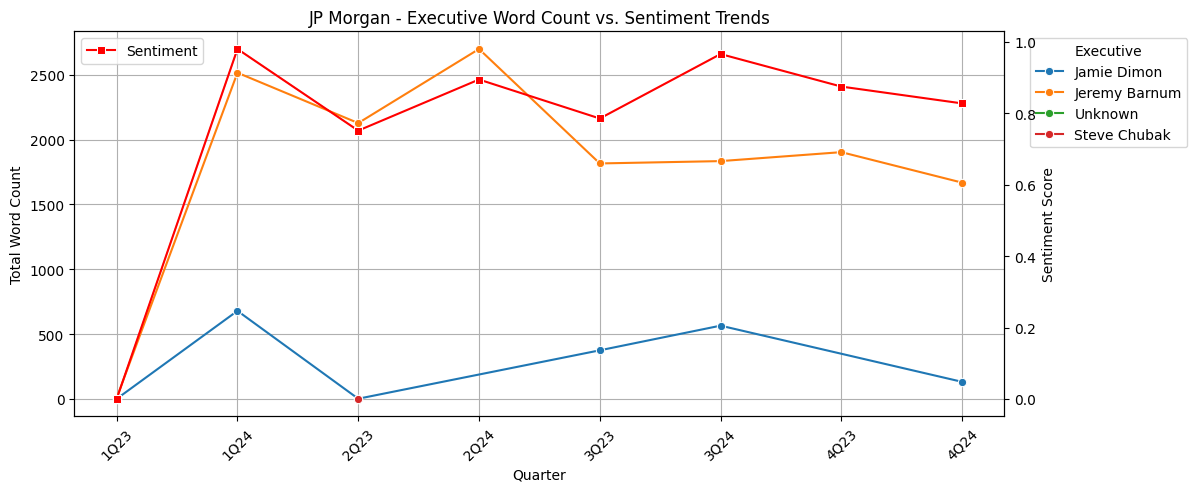

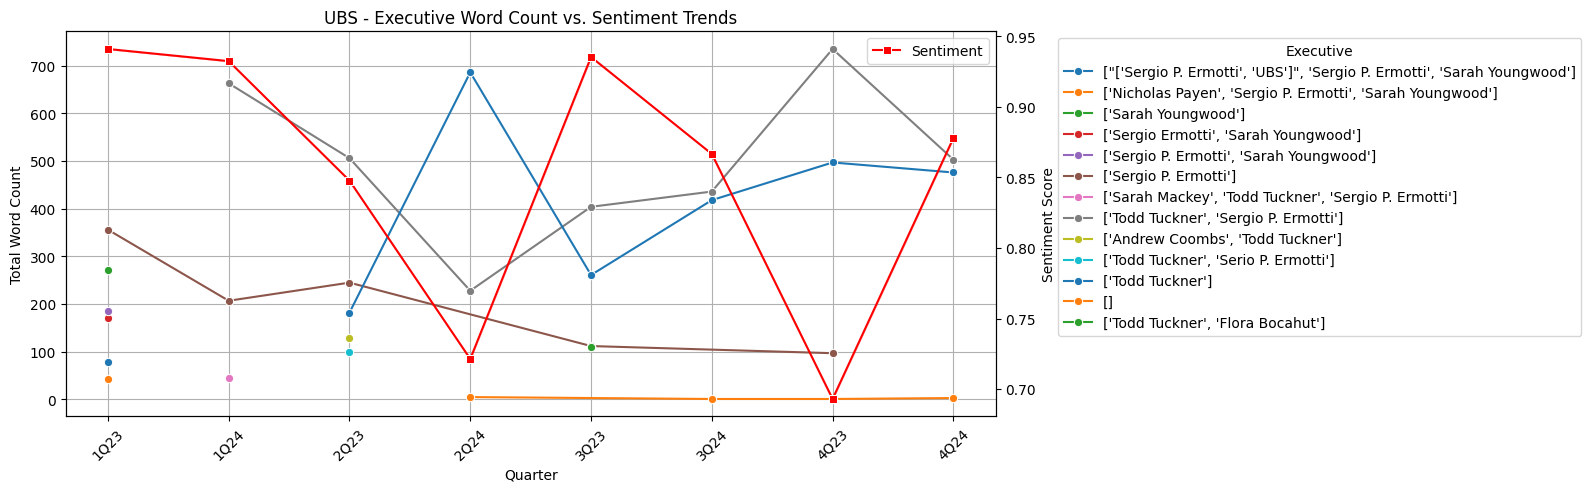

In [10]:
%run kk_eda_V2.ipynb

# 3. Topic Modeling

## 3.1 Topic Modelling with BERTopic

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/modelling/kk_mvp_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive

 Final Data Overview Per Bank:
- JPM Analyst Questions: 78
- UBS Analyst Questions: 96
- JPM Executive Answers: 78
- UBS Executive Answers: 96
- JPM Management Discussion Entries: 100
- UBS Management Discussion Entries: 279


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


 Running BERTopic on JPM Analyst Questions...

 BERTopic Completed with KMeans on JPM Analyst Questions!
   Topic  Count                                     Name  \
0      0     10         0_loan_growth_loan growth_demand   
1      1     10             1_markets_maybe_jeremy_terms   
2      2      9              2_billion_nii_year_republic   
3      3      9         3_think_question_capital_quarter   
4      4      8           4_capital_question_jamie_think   
5      5      8                5_nii_deposit_guess_curve   
6      6      7            6_deposits_consumer_know_guys   
7      7      6        7_deposit_outlook_migration_color   
8      8      6  8_lending_private_private credit_market   
9      9      5           9_great quarter_great_quarter_   

                                      Representation  \
0  [loan, growth, loan growth, demand, fed, tradi...   
1  [markets, maybe, jeremy, terms, lot, think, ra...   
2  [billion, nii, year, republic, tech, liquidity...   
3  [think

<Figure size 1200x600 with 0 Axes>

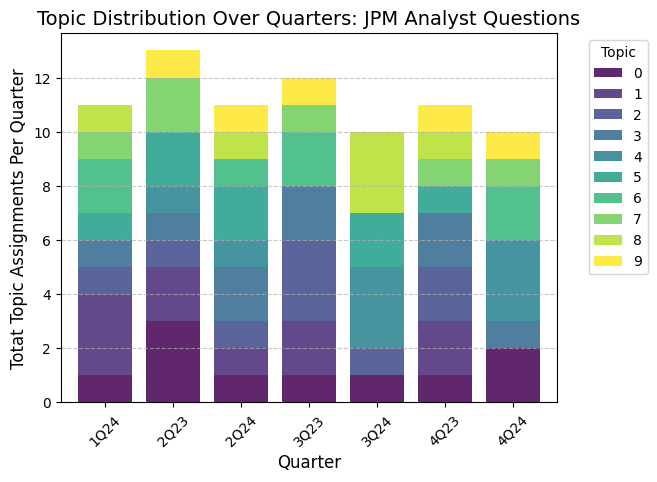

<Figure size 1200x600 with 0 Axes>

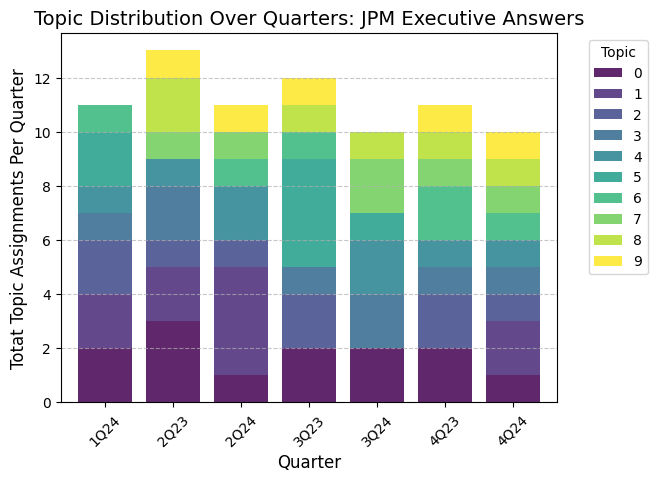

<Figure size 1200x600 with 0 Axes>

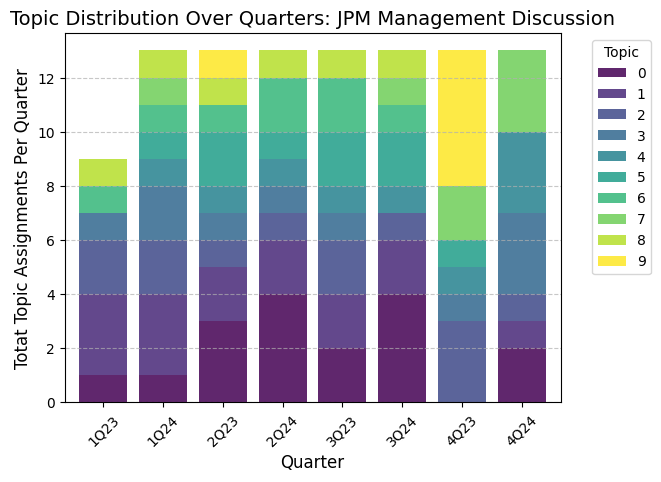


 Visualizing Topic Trends for UBS...


<Figure size 1200x600 with 0 Axes>

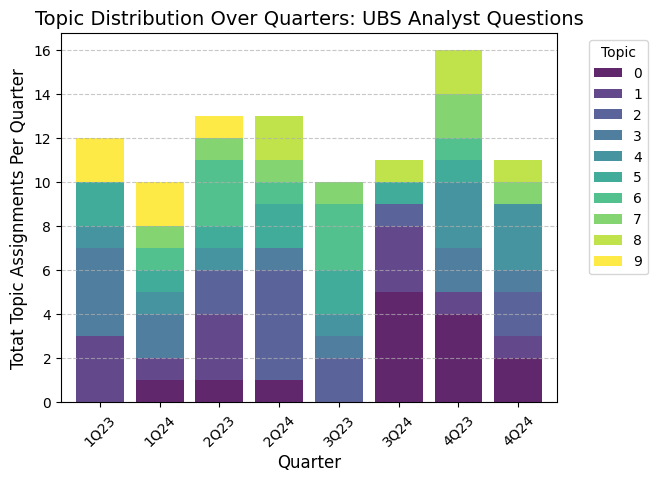

<Figure size 1200x600 with 0 Axes>

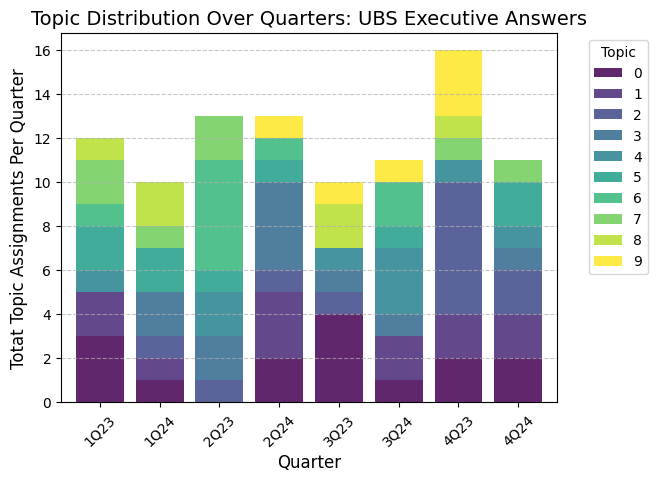

<Figure size 1200x600 with 0 Axes>

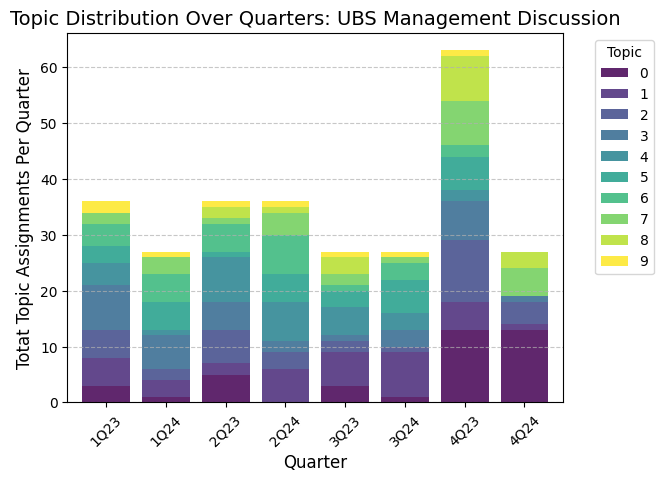

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0



 Running Sentiment Analysis on JPM Analyst Questions...
 Completed: JPM Analyst Questions
 Sentiment Distribution: {'neutral': 74, 'positive': 3, 'negative': 1}

 Running Sentiment Analysis on JPM Executive Answers...
 Completed: JPM Executive Answers
 Sentiment Distribution: {'neutral': 77, 'positive': 1}

 Running Sentiment Analysis on JPM Management Discussion...
 Completed: JPM Management Discussion
 Sentiment Distribution: {'positive': 51, 'neutral': 33, 'negative': 16}

 Running Sentiment Analysis on UBS Analyst Questions...
 Completed: UBS Analyst Questions
 Sentiment Distribution: {'neutral': 88, 'positive': 7, 'negative': 1}

 Running Sentiment Analysis on UBS Executive Answers...
 Completed: UBS Executive Answers
 Sentiment Distribution: {'neutral': 87, 'positive': 8, 'negative': 1}

 Running Sentiment Analysis on UBS Management Discussion...
 Completed: UBS Management Discussion
 Sentiment Distribution: {'positive': 145, 'neutral': 81, 'negative': 53}

 Sentiment Analysis C

<Figure size 1200x600 with 0 Axes>

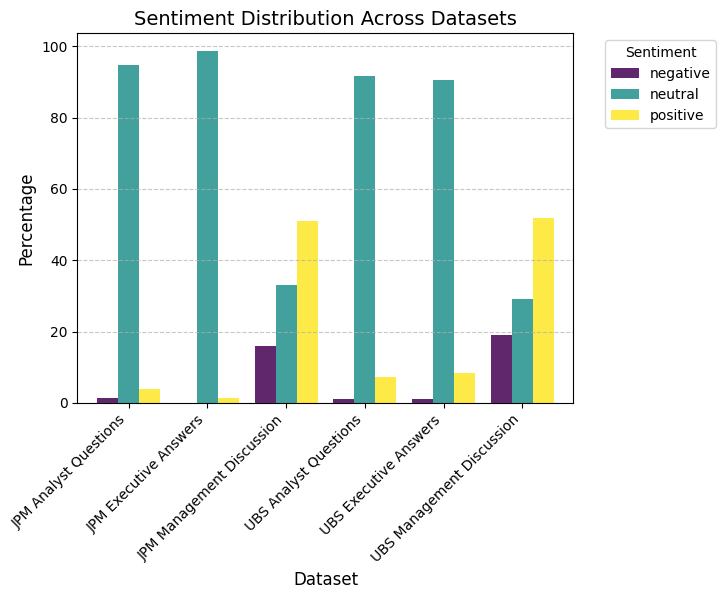

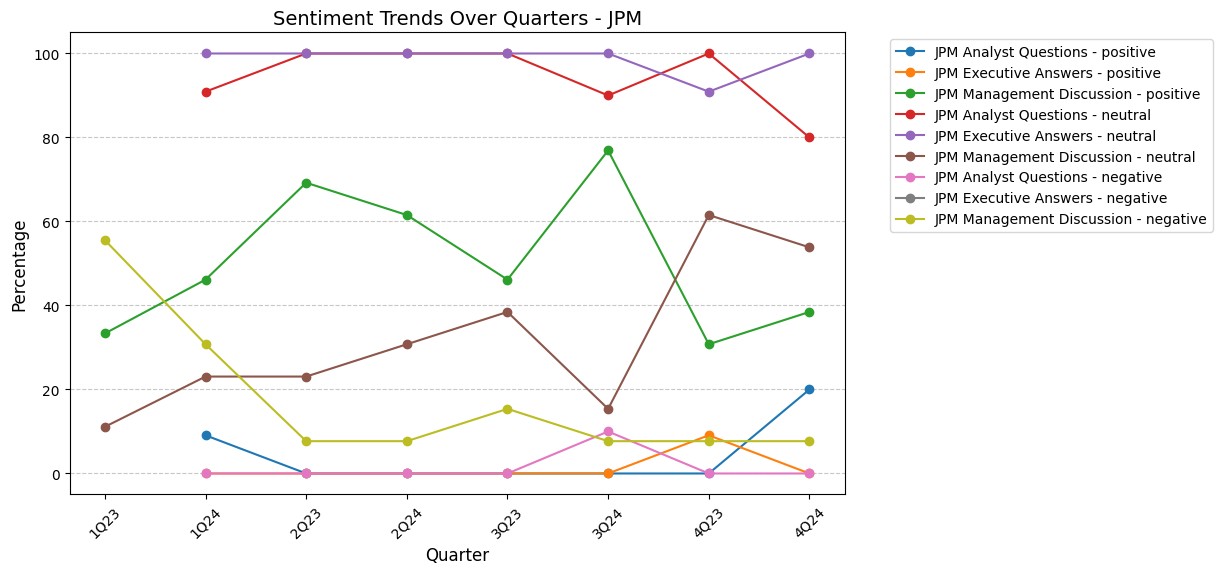

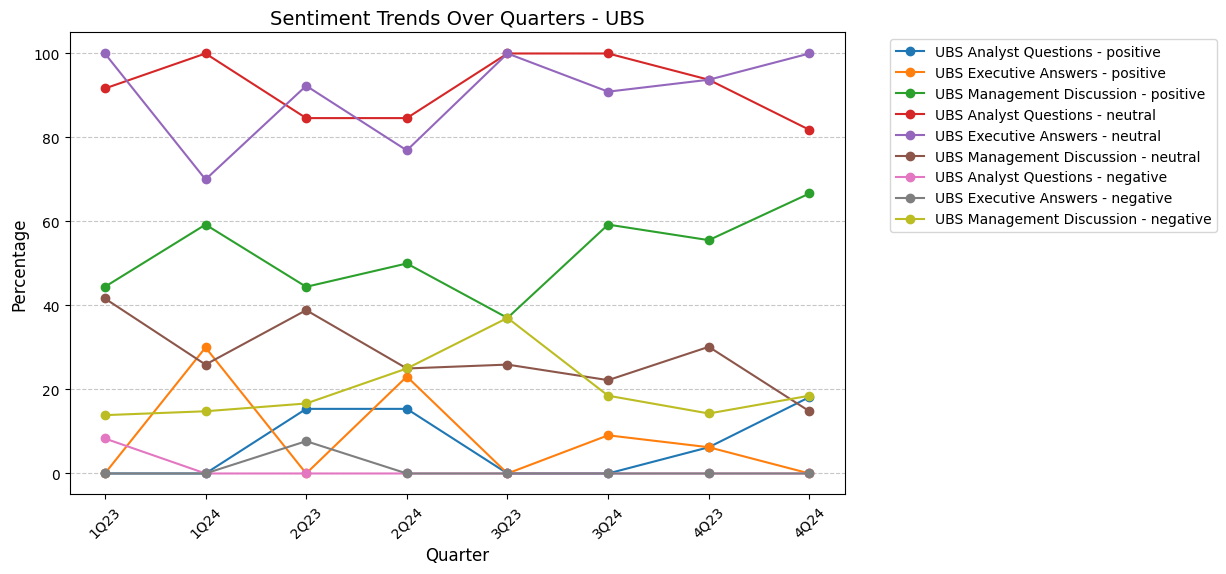

Device set to use cuda:0


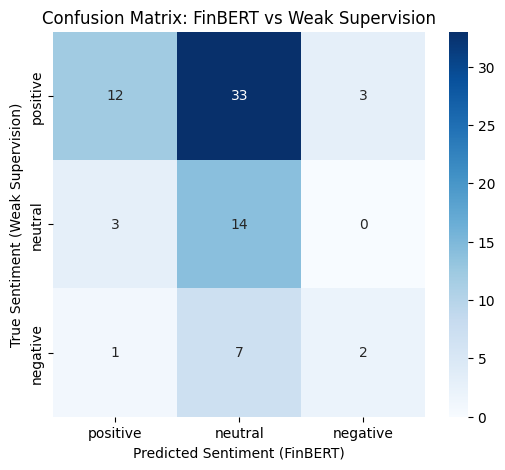


 Classification Report (FinBERT vs Weak Supervision):
              precision    recall  f1-score   support

    positive       0.40      0.20      0.27        10
     neutral       0.26      0.82      0.39        17
    negative       0.75      0.25      0.38        48

    accuracy                           0.37        75
   macro avg       0.47      0.42      0.35        75
weighted avg       0.59      0.37      0.36        75



In [11]:
%run kk_mvp_modelling_V2.ipynb

## 3.2 Refined Topic Modelling Approach (GPT-4 Clustering)

am_topic_modelling_analysis_v1_0.ipynb

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/modelling/am_topic_modelling_analysis_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# %run am_topic_modelling_analysis_v1_0.ipynb

am_boe_topic_modelling_v2.ipynb

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/modelling/am_boe_topic_modelling_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
%run am_boe_topic_modelling_v2.ipynb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 5.2 MB/s eta 0:00:00
Mounted at /content/drive
CSV file loaded successfully.
Defining GPT-4-Turbo function for topic extraction...
Topic extraction for questions completed.
Applying GPT-4-Turbo function on 'Response_cleand' column...
Topic extraction for responses completed.
Saving final DataFrame to CSV...
CSV file saved successfully.
Saving final DataFrame to CSV...
CSV file saved successfully.
CSV file saved successfully.


am_hierarchial_topic_clustering.ipynb

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/modelling/am_hierarchial_topic_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# %run am_hierarchial_topic_clustering.ipynb

am_data_processing_risk_high_topics_v2_0.ipynb

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/modelling/am_data_processing_risk_high_topics_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# %run am_data_processing_risk_high_topics_v2_0.ipynb

am_topic_clustering_visualization.ipynb

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/modelling/am_topic_clustering_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# %run am_topic_clustering_visualization.ipynb

# 4. Sentiment

## Sentiment Modelling with Flan T5

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/modelling/ob_flan_t5_sentiment_jpm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%run ob_flan_t5_sentiment_jpm.ipynb

Mounted at /content/drive
JPM Answer Snippet Sentiment:
 snippet_sent
Neutral     335
Positive     81
Negative     18
Name: count, dtype: int64

UBS Answer Snippet Sentiment:
 snippet_sent
Neutral     268
Positive     69
Negative     20
Name: count, dtype: int64

JPM Question Snippet Sentiment:
 snippet_sent
Neutral     311
Positive     64
Negative     12
Name: count, dtype: int64

UBS Question Snippet Sentiment:
 snippet_sent
Neutral     370
Positive     93
Negative     13
Name: count, dtype: int64


# 5. Summarization

## Summarisation with Flan-T5

<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/modelling/rb_jomorgan_summarisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run rb_flan_t5_summarisation.ipynb

Mounted at /content/drive


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

# 6. Integration (RAG system)


<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/modelling/sk_gen_ai_rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run sk_gen_ai_rag.ipynb

## 3.1 Run interactive chatbot

In [ ]:

run_master_agent_interactive()
